# Лабораторна робота 2.

## Створення штучно синтезованих наборів даних

**Лабораторна робота виконується індивідуально. Використання запозиченого коду буде оцінюватись в 0 балів.**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Завдання 1: Синтезувати набір даних, який складається з двох лінійно роздільних множин, що можуть бути використані для навчання моделей класифікації.**


**Роз'яснення до завдання 1:**

1. **Опис набору даних:**
   - Набір даних повинен містити дві класифікаційні мітки (клас 1 і клас 2).
   - Кожен об'єкт набору даних повинен бути представленим у вигляді точки в двовимірному просторі $(x, y)$.

2. **Вимоги до генерації даних:**
   - Обидва класи мають бути лінійно роздільні, тобто можна знайти таку пряму, яка розділяє дані двох класів без помилок.
   - Дані повинні бути рівномірно розподілені по всьому простору, але з певним відхиленням для забезпечення реалістичності.
   - Можливі варіанти синтезу:
     - Використання нормального розподілу для генерації точок навколо центроїдів двох класів.
     - Додавання невеликого шуму до кожного класу для забезпечення варіативності даних.

3. **Параметри набору даних:**
   - Кількість точок (об'єктів) у наборі даних: **500** для кожного класу (всього **1000**).
   - Формат вихідних даних: CSV-файл, де кожен рядок містить значення координат $(x, y)$ і відповідну мітку класу.

4. **Очікуваний результат:**
   - CSV-файл, який містить **1000** рядків з трьома колонками: $x$, $y$, $class$.
   - Перевірка лінійної роздільності: Побудуйте графік з нанесеними точками і покажіть лінію, яка розділяє два класи.

5. **Додаткові умови:**
- Зробіть аналіз набору даних, побудувавши гістограми розподілу даних для кожного класу окремо.
- Опишіть підходи, які використовувалися для створення набору даних.

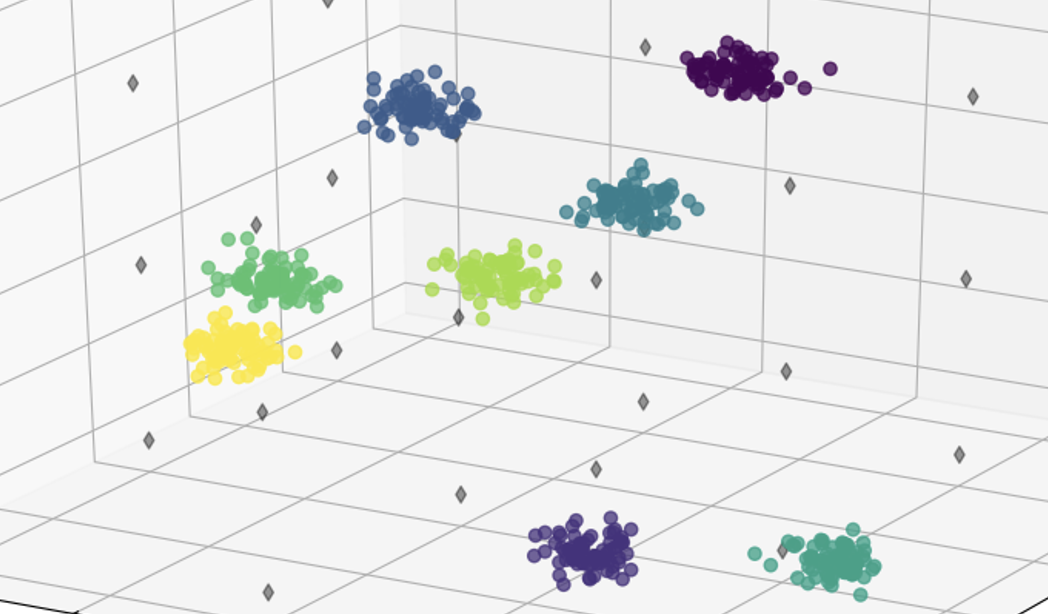

Налаштування параметрів

In [2]:
num_points = 500
mean_class1 = [2, 2]
mean_class2 = [-2, -2]
std_dev = 0.5

class1_points = np.random.normal(loc=mean_class1, scale=std_dev, size=(num_points, 2))
class1_labels = np.ones(num_points)

class2_points = np.random.normal(loc=mean_class2, scale=std_dev, size=(num_points, 2))
class2_labels = np.zeros(num_points)

data_points = np.vstack((class1_points, class2_points))
data_labels = np.concatenate((class1_labels, class2_labels))

df = pd.DataFrame(data_points, columns=['x', 'y'])
df['class'] = data_labels

df.to_csv('dataset.csv', index=False)

/var/folders/w6/d2qw7g4x7bqd_h483v7f6s_h0000gn/T/ipykernel_41482/3024919094.py:8: RuntimeWarning: divide by zero encountered in divide
  y_values = (-mean_class1[0] * x_values - mean_class2[0]) / (mean_class1[1] - mean_class2[1])


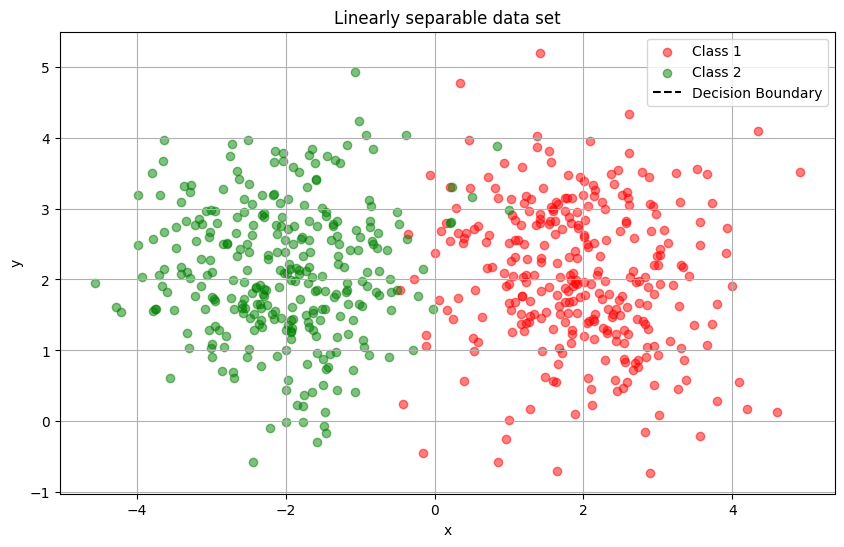

In [8]:
plt.figure(figsize=(10, 6))

plt.scatter(class1_points[:, 0], class1_points[:, 1], color='red', label='Class 1', alpha=0.5)

plt.scatter(class2_points[:, 0], class2_points[:, 1], color='green', label='Class 2', alpha=0.5)

x_values = np.linspace(-5, 5, 100)
y_values = (-mean_class1[0] * x_values - mean_class2[0]) / (mean_class1[1] - mean_class2[1])
plt.plot(x_values, y_values, color='black', linestyle='--', label='Decision Boundary')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Linearly separable data set')
plt.legend()
plt.grid(True)
plt.show()


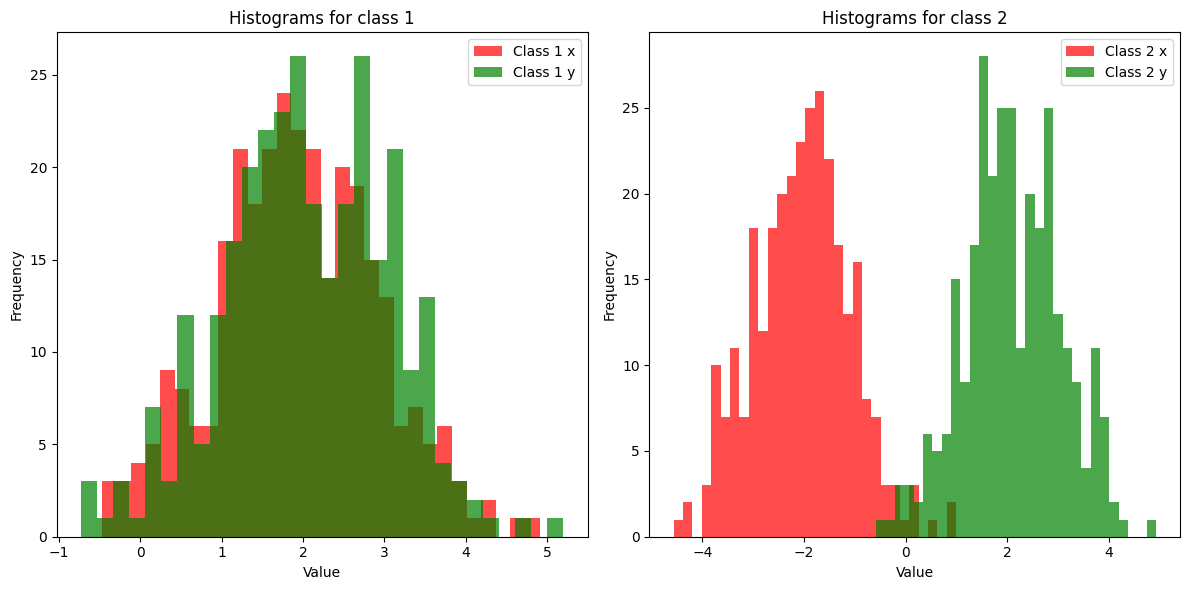

In [9]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(class1_points[:, 0], bins=30, alpha=0.7, color='red', label='Class 1 x')
plt.hist(class1_points[:, 1], bins=30, alpha=0.7, color='green', label='Class 1 y')
plt.title('Histograms for class 1')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(class2_points[:, 0], bins=30, alpha=0.7, color='red', label='Class 2 x')
plt.hist(class2_points[:, 1], bins=30, alpha=0.7, color='green', label='Class 2 y')
plt.title('Histograms for class 2')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()


-------------------------------------
<B>Висновок:<b>

1. Нормальний розподіл: Ми створили точки для кожного класу, розміщуючи їх навколо певних центрів, що допомагає рівномірно розподілити дані навколо цих центрів.

2. Шум: Додали трохи випадкових варіацій, щоб дані виглядали більш реалістично.

3. Візуалізація: Ми побудували графіки та гістограми, щоб показати, як розподілені точки і перевірити, чи можна розділити два класи прямою лінією.

-------------------------------------

**Завдання 2: Синтезувати набір даних, який складається з трьох множин (класів), що мають часткове перекриття, для використання в задачах класифікації та аналізу даних.**

**Роз'яснення до завдання 2:**

1. **Опис набору даних:**
   - Набір даних повинен містити три класифікаційні мітки (клас 1, клас 2, клас 3).
   - Кожен об'єкт набору даних повинен бути представленим у вигляді точки в двовимірному просторі $(x, y)$.

2. **Вимоги до генерації даних:**
   - Дані мають утворювати три множини, кожна з яких розподілена навколо свого центру, але з перекриттям з іншими множинами.
   - Кожен клас повинен мати певну ступінь перекриття з іншими класами, що призводить до часткової змішуваності точок з різними мітками.
   - Можливі варіанти синтезу:
     - Використання нормального розподілу для генерації точок навколо центроїдів кожного класу.
     - Додавання більшого шуму або кореляції між точками для збільшення ступеня перекриття.

3. **Параметри набору даних:**
   - Кількість точок (об'єктів) у наборі даних: **300** для кожного класу (всього **900**).
   - Формат вихідних даних: CSV-файл, де кожен рядок містить значення координат $(x, y)$ і відповідну мітку класу.

4. **Очікуваний результат:**
   - CSV-файл, який містить **900** рядків з трьома колонками: $x$, $y$, $class$.
   - Побудуйте графік з нанесеними точками для всіх трьох класів, щоб візуалізувати перекриття множин.
   - Перевірте, чи дійсно дані утворюють перекриття між класами, показавши частку точок, які належать до зон перекриття.

5. **Додаткові умови:**
   - Побудуйте кореляційні графіки та гістограми розподілу для кожного класу.
   - Опишіть підходи, які використовувалися для створення набору даних, і обґрунтуйте вибір параметрів.

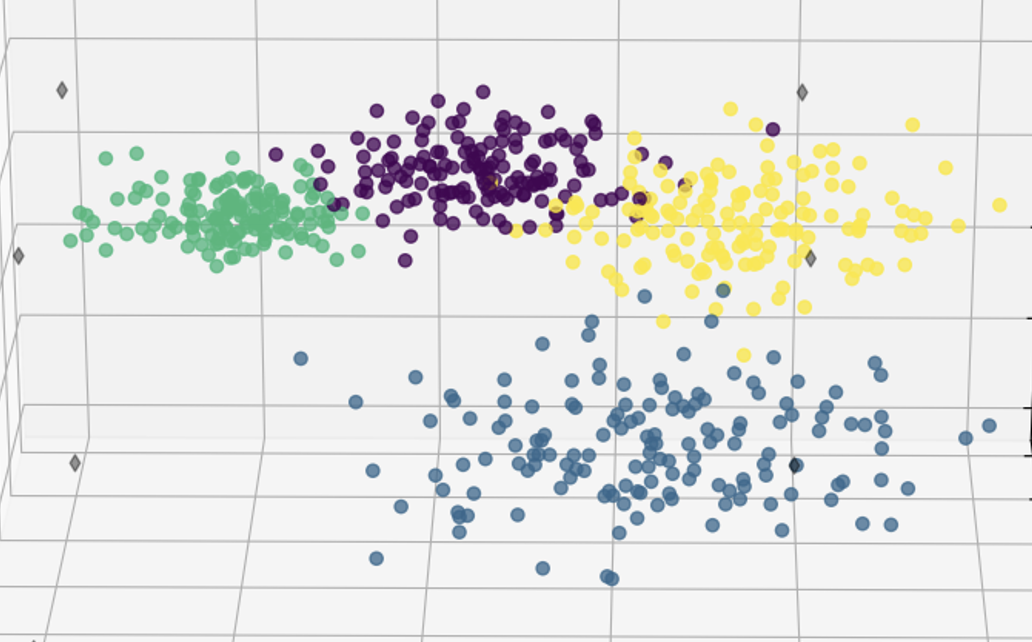

In [20]:
num_points_per_class = 300
mean_class1 = [2, 2]
mean_class2 = [-2, 2]
mean_class3 = [0, -2]
std_dev = 1.0

class1_points = np.random.normal(loc=mean_class1, scale=std_dev, size=(num_points_per_class, 2))
class1_labels = np.ones(num_points_per_class)

class2_points = np.random.normal(loc=mean_class2, scale=std_dev, size=(num_points_per_class, 2))
class2_labels = np.ones(num_points_per_class) * 2

class3_points = np.random.normal(loc=mean_class3, scale=std_dev, size=(num_points_per_class, 2))
class3_labels = np.ones(num_points_per_class) * 3

data_points = np.vstack((class1_points, class2_points, class3_points))
data_labels = np.concatenate((class1_labels, class2_labels, class3_labels))

df = pd.DataFrame(data_points, columns=['x', 'y'])
df['class'] = data_labels

df.to_csv('dataset_three_classes.csv', index=False)

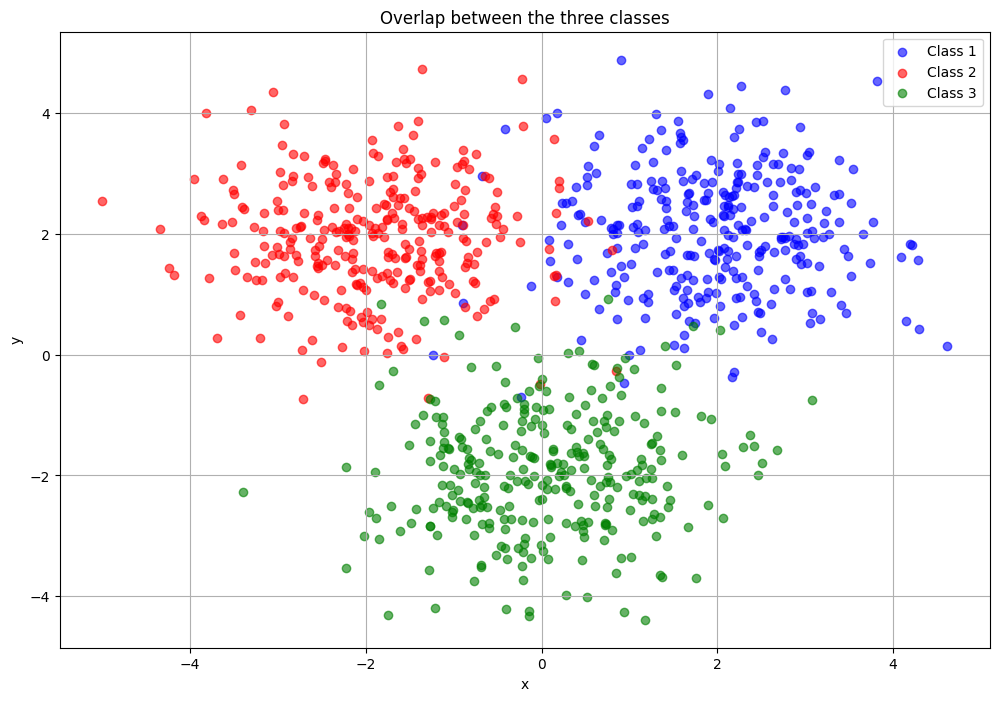

In [21]:
plt.figure(figsize=(12, 8))

plt.scatter(class1_points[:, 0], class1_points[:, 1], color='blue', label='Class 1', alpha=0.6)

plt.scatter(class2_points[:, 0], class2_points[:, 1], color='red', label='Class 2', alpha=0.6)

plt.scatter(class3_points[:, 0], class3_points[:, 1], color='green', label='Class 3', alpha=0.6)

plt.xlabel('x')
plt.ylabel('y')
plt.title('Overlap between the three classes')
plt.legend()
plt.grid(True)
plt.show()


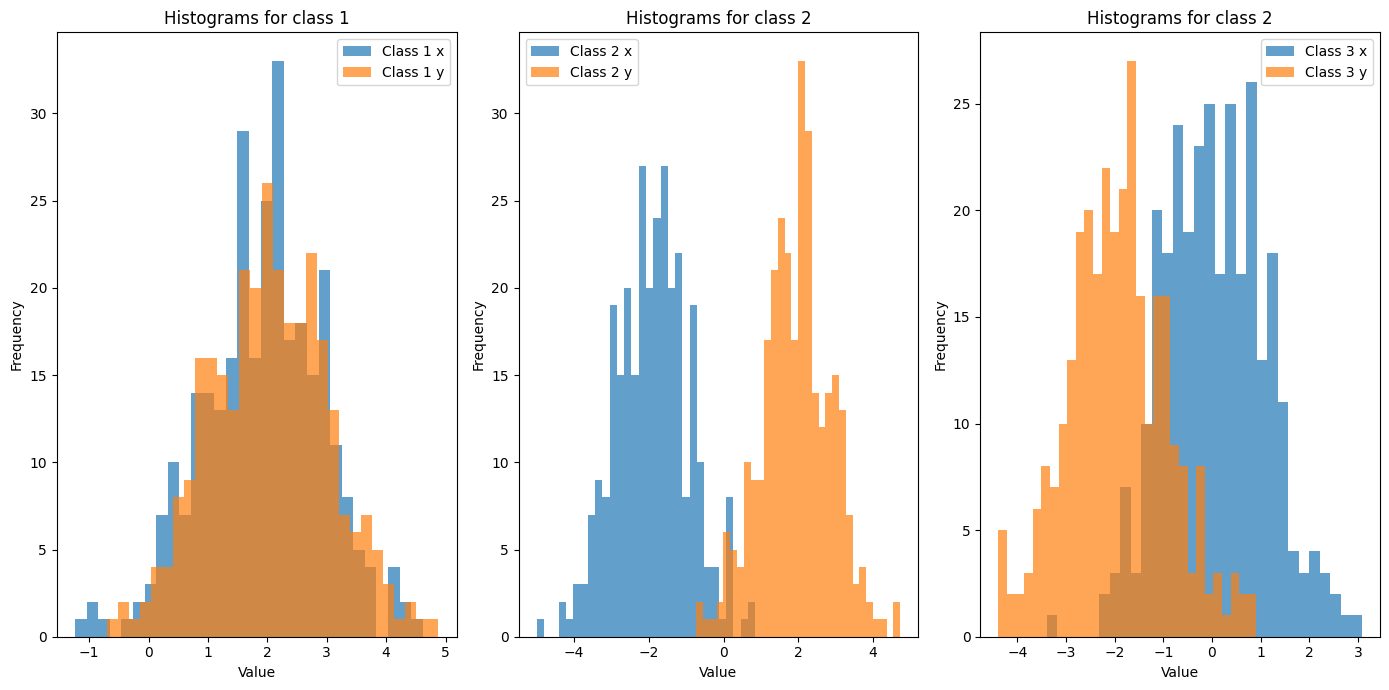

In [22]:
plt.figure(figsize=(14, 7))

plt.subplot(1, 3, 1)
plt.hist(class1_points[:, 0], bins=30, alpha=0.7, label='Class 1 x')
plt.hist(class1_points[:, 1], bins=30, alpha=0.7, label='Class 1 y')
plt.title('Histograms for class 1')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()

plt.subplot(1, 3, 2)
plt.hist(class2_points[:, 0], bins=30, alpha=0.7, label='Class 2 x')
plt.hist(class2_points[:, 1], bins=30, alpha=0.7, label='Class 2 y')
plt.title('Histograms for class 2')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()

plt.subplot(1, 3, 3)
plt.hist(class3_points[:, 0], bins=30, alpha=0.7, label='Class 3 x')
plt.hist(class3_points[:, 1], bins=30, alpha=0.7, label='Class 3 y')
plt.title('Histograms for class 2')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()


Висновок:

**Завдання 3: Синтезувати набір даних, який складається з двох множин у формі "тор в торі", де одна множина має форму внутрішнього тора, а інша — зовнішнього тора.**

**Роз'яснення до завдання 3:**

1. **Опис набору даних:**
   - Набір даних повинен містити дві класифікаційні мітки (клас 1 і клас 2).
   - Кожен об'єкт набору даних повинен бути представленим у вигляді точки в двовимірному просторі $(x, y)$.

2. **Вимоги до генерації даних:**
   - Дані повинні утворювати дві множини у формі тора: одна множина повинна бути розташована всередині іншої (тобто, "тор в торі").
   - Внутрішній тор (клас 1) повинен мати менший радіус і ширину, ніж зовнішній тор (клас 2).
   - Розподіл точок повинен бути рівномірним вздовж кожного тора з додаванням невеликого шуму для забезпечення варіативності.

3. **Параметри набору даних:**
   - Кількість точок (об'єктів) у наборі даних: **500** для кожного класу (всього **1000**).
   - Формат вихідних даних: CSV-файл, де кожен рядок містить значення координат $(x, y) $і відповідну мітку класу.

4. **Очікуваний результат:**
   - CSV-файл, який містить **1000** рядків з трьома колонками: $x$, $y$, $class$.
   - Побудуйте графік з нанесеними точками для обох класів, щоб візуалізувати форму "тор в торі".
   - Перевірте розподіл точок уздовж кожного тора, побудувавши радіальні гістограми для кожного класу.

5. **Додаткові умови:**
   - Побудуйте окремі графіки, які демонструють розподіл даних для кожного тора окремо.
   - Опишіть процес генерації даних та поясніть вибір параметрів для кожного тора.

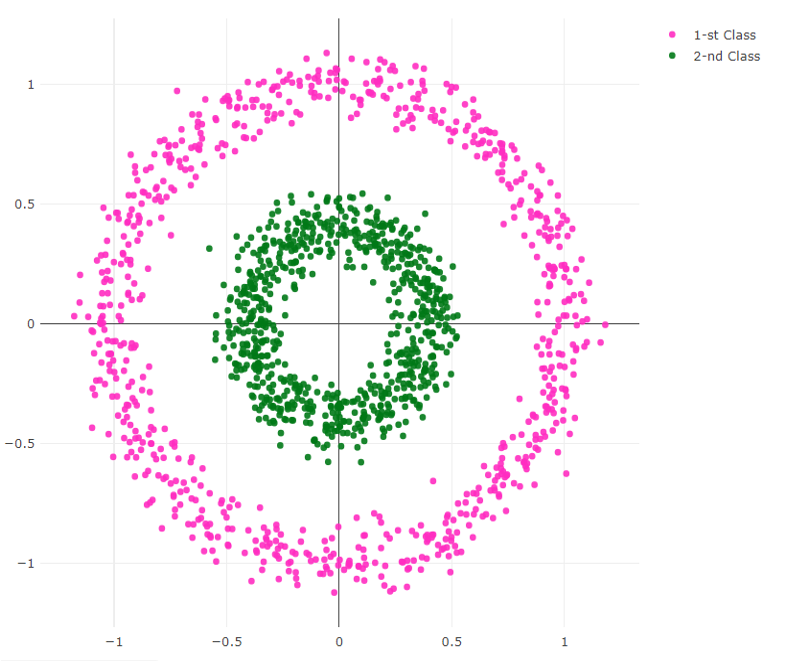

In [23]:
num_points = 500
inner_radius = 5
inner_width = 1
inner_noise = 0.1

outer_radius = 10
outer_width = 1
outer_noise = 0.1

In [24]:
theta_inner = np.random.uniform(0, 2 * np.pi, num_points)
r_inner = np.random.normal(inner_radius, inner_width, num_points)
x_inner = r_inner * np.cos(theta_inner) + np.random.normal(0, inner_noise, num_points)
y_inner = r_inner * np.sin(theta_inner) + np.random.normal(0, inner_noise, num_points)
class1_labels = np.ones(num_points)

theta_outer = np.random.uniform(0, 2 * np.pi, num_points)
r_outer = np.random.normal(outer_radius, outer_width, num_points)
x_outer = r_outer * np.cos(theta_outer) + np.random.normal(0, outer_noise, num_points)
y_outer = r_outer * np.sin(theta_outer) + np.random.normal(0, outer_noise, num_points)
class2_labels = np.zeros(num_points)

In [25]:
x = np.concatenate((x_inner, x_outer))
y = np.concatenate((y_inner, y_outer))
labels = np.concatenate((class1_labels, class2_labels))

df = pd.DataFrame({'x': x, 'y': y, 'class': labels})

df.to_csv('torus_dataset.csv', index=False)

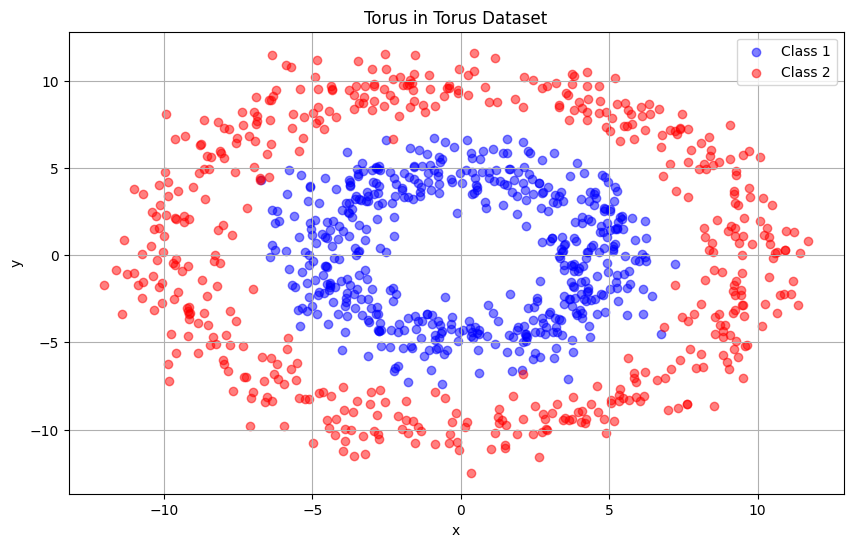

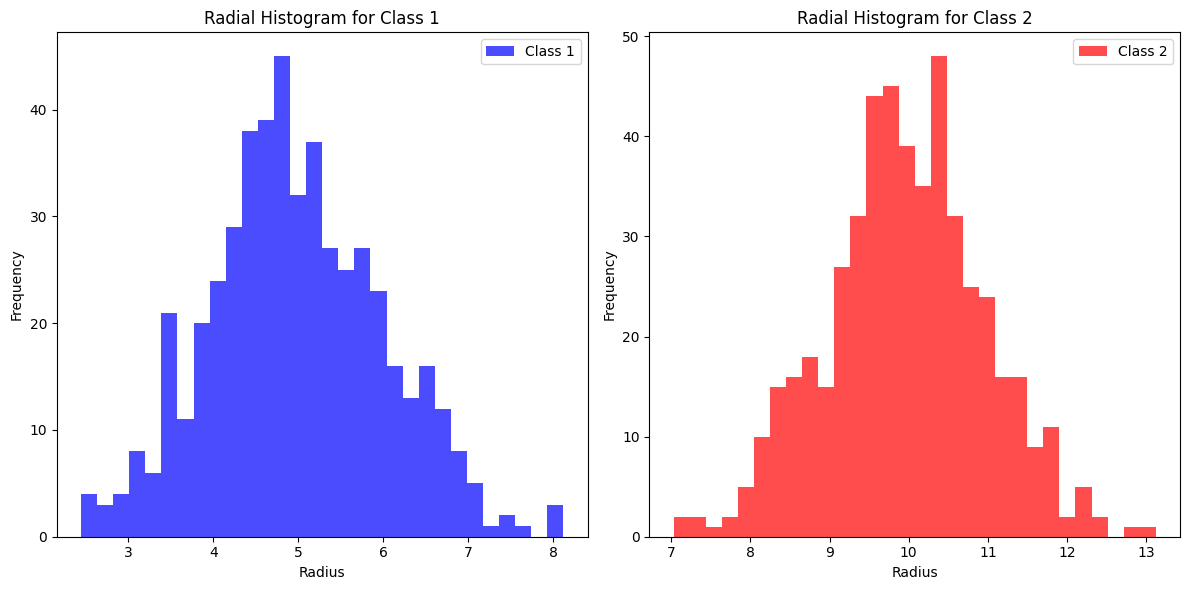

In [26]:
plt.figure(figsize=(10, 6))
plt.scatter(x_inner, y_inner, color='blue', label='Class 1', alpha=0.5)
plt.scatter(x_outer, y_outer, color='red', label='Class 2', alpha=0.5)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Torus in Torus Dataset')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
r_inner_hist = np.sqrt(x_inner**2 + y_inner**2)
plt.hist(r_inner_hist, bins=30, alpha=0.7, color='blue', label='Class 1')
plt.title('Radial Histogram for Class 1')
plt.xlabel('Radius')
plt.ylabel('Frequency')
plt.legend()

plt.subplot(1, 2, 2)
r_outer_hist = np.sqrt(x_outer**2 + y_outer**2)
plt.hist(r_outer_hist, bins=30, alpha=0.7, color='red', label='Class 2')
plt.title('Radial Histogram for Class 2')
plt.xlabel('Radius')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()

**Завдання 4: Синтезувати набір даних, який складається з двох множин, що утворюють подвійну спіраль, де одна спіраль огортає іншу.**

**Роз'яснення до завдання 4:**

1. **Опис набору даних:**
   - Набір даних повинен містити дві класифікаційні мітки (клас 1 і клас 2).
   - Кожен об'єкт набору даних повинен бути представленим у вигляді точки в двовимірному просторі $(x, y)$.

2. **Вимоги до генерації даних:**
   - Дані повинні утворювати дві спіралі, закручені одна в іншу, так щоб кожна спіраль відповідала одному з класів.
   - Спіралі повинні мати протилежні напрямки закручування (одна за годинниковою стрілкою, інша — проти).
   - Кожна спіраль повинна бути рівномірно заповнена точками з невеликим додаванням шуму для варіативності даних.

3. **Параметри набору даних:**
   - Кількість точок (об'єктів) у наборі даних: **500** для кожного класу (всього **1000**).
   - Формат вихідних даних: CSV-файл, де кожен рядок містить значення координат $(x, y)$ і відповідну мітку класу.

4. **Очікуваний результат:**
   - CSV-файл, який містить **1000** рядків з трьома колонками: $x$, $y$, $class$.
   - Побудуйте графік з нанесеними точками для обох спіралей, щоб візуалізувати структуру "спіраль у спіралі".
   - Проаналізуйте відмінності у розподілі точок для обох класів та оцініть складність їх розділення.

5. **Додаткові умови:**
   - Створіть окремі графіки, що показують як закручується кожна спіраль.
   - Опишіть процес генерації даних, включаючи параметри, що використовувалися для визначення форми спіралей.

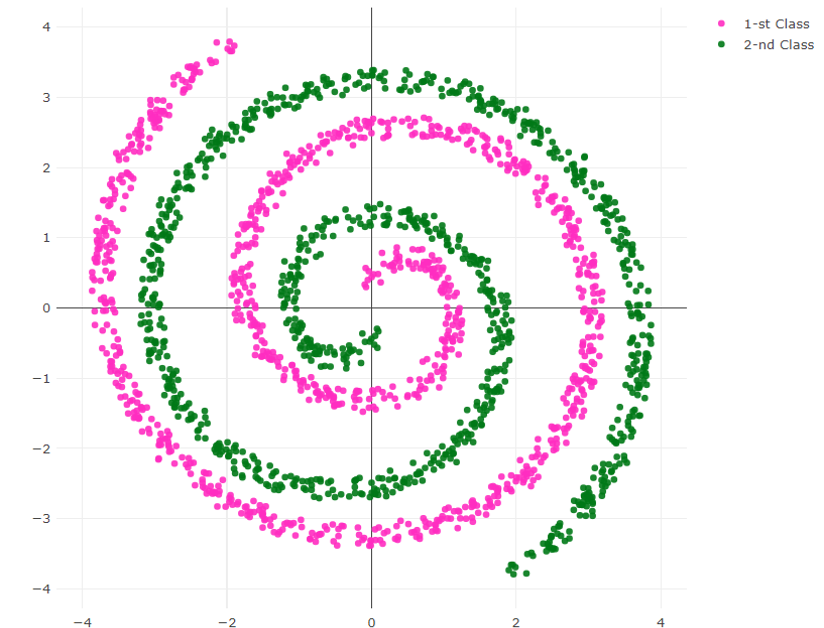

In [27]:
n_points = 500
noise = 0.1

def generate_spiral(n_points, noise, clockwise=True):
    theta = np.sqrt(np.random.rand(n_points)) * 2 * np.pi  # кут
    r = 2 * theta + np.pi  
    if clockwise:
        x = r * np.cos(theta) + np.random.randn(n_points) * noise
        y = r * np.sin(theta) + np.random.randn(n_points) * noise
    else:
        x = -r * np.cos(theta) + np.random.randn(n_points) * noise
        y = -r * np.sin(theta) + np.random.randn(n_points) * noise
    return x, y

x1, y1 = generate_spiral(n_points, noise, clockwise=True)
x2, y2 = generate_spiral(n_points, noise, clockwise=False)


data1 = pd.DataFrame({'x': x1, 'y': y1, 'class': 1})
data2 = pd.DataFrame({'x': x2, 'y': y2, 'class': 2})
data = pd.concat([data1, data2])


data.to_csv('spiral_data.csv', index=False)


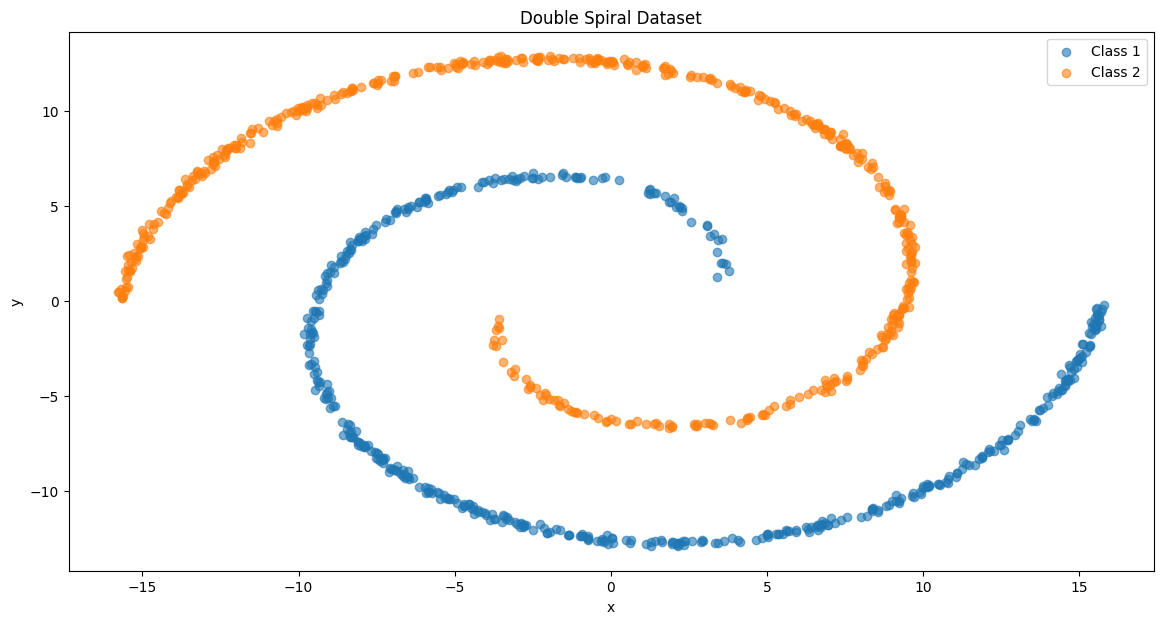

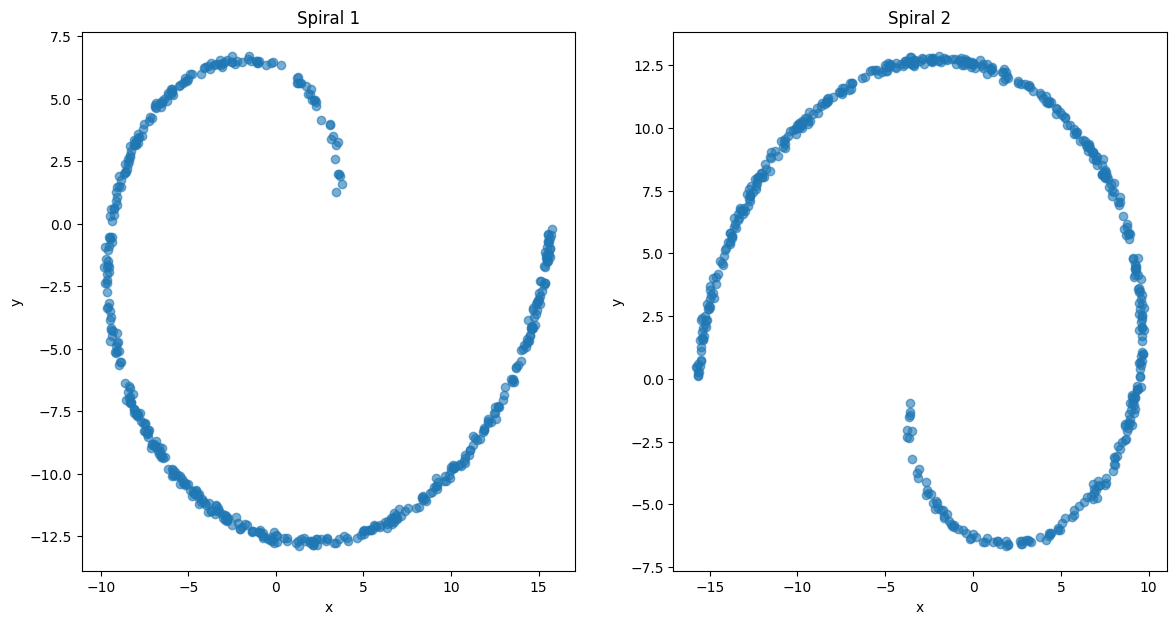

In [28]:
plt.figure(figsize=(14, 7))
plt.scatter(data1['x'], data1['y'], label='Class 1', alpha=0.6)
plt.scatter(data2['x'], data2['y'], label='Class 2', alpha=0.6)
plt.legend()
plt.title('Double Spiral Dataset')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
plt.scatter(data1['x'], data1['y'], label='Class 1', alpha=0.6)
plt.title('Spiral 1')
plt.xlabel('x')
plt.ylabel('y')

plt.subplot(1, 2, 2)
plt.scatter(data2['x'], data2['y'], label='Class 2', alpha=0.6)
plt.title('Spiral 2')
plt.xlabel('x')
plt.ylabel('y')

plt.show()

**Завдання 5: Синтезувати кілька наборів даних, що описують траєкторії системи Лоренца з різними параметрами, дослідити вплив параметрів на динаміку системи та візуалізувати результати.**


### 5.1: Теоретичне підґрунтя

**Опис системи Лоренца:**
Система Лоренца — це набір трьох нелінійних диференціальних рівнянь, що описують динаміку тривимірної системи з хаотичною поведінкою. Вона визначається такими рівняннями:

$$
\frac{dx}{dt} = \sigma (y - x)
$$

$$
\frac{dy}{dt} = x (\rho - z) - y
$$

$$
\frac{dz}{dt} = xy - \beta z
$$

Де:
- $(x, y, z)$ — змінні стану системи.
- $\sigma$ — параметр, що відповідає за швидкість зміни (часто називають "параметр Прандтля").
- $\rho$ — параметр, що відповідає за різницю температур у системі (відповідає за інтенсивність конвекції).
- $\beta$  — параметр, що відповідає за співвідношення розмірів.

**Роз'яснення до завдання:**
- Згенерувати дані для системи Лоренца за допомогою різних значень параметрів $\sigma$, $\rho$ та $\beta$.
- Проаналізувати вплив зміни параметрів на траєкторії системи.
- Візуалізувати результати в тривимірному просторі для кожного набору даних.

### 5.2: Генерація та візуалізація набору даних

**Що треба зробити:**

1. **Генерація даних:**
   - Вибрати декілька різних комбінацій параметрів $\sigma$, $\rho$ та $\beta$.
   - Використовуючи числовий метод (наприклад, метод Рунге-Кутти 4-го порядку), згенерувати траєкторії системи Лоренца для кожного набору параметрів.

2. **Візуалізація:**
   - Для кожного набору параметрів побудувати тривимірні графіки траєкторій.
   - Відобразити траєкторії в просторі $(x, y, z)$.

3. **Аналіз:**
   - Порівняти результати для різних наборів параметрів.
   - Описати, як зміна кожного з параметрів впливає на поведінку системи (наприклад, перехід від стабільного до хаотичного режиму).

**Очікуваний результат:**
- Кілька наборів даних, що описують траєкторії системи Лоренца з різними параметрами (мінімум 3).
- Візуалізації цих траєкторій у тривимірному просторі.
- Аналіз і опис впливу параметрів на динаміку системи.

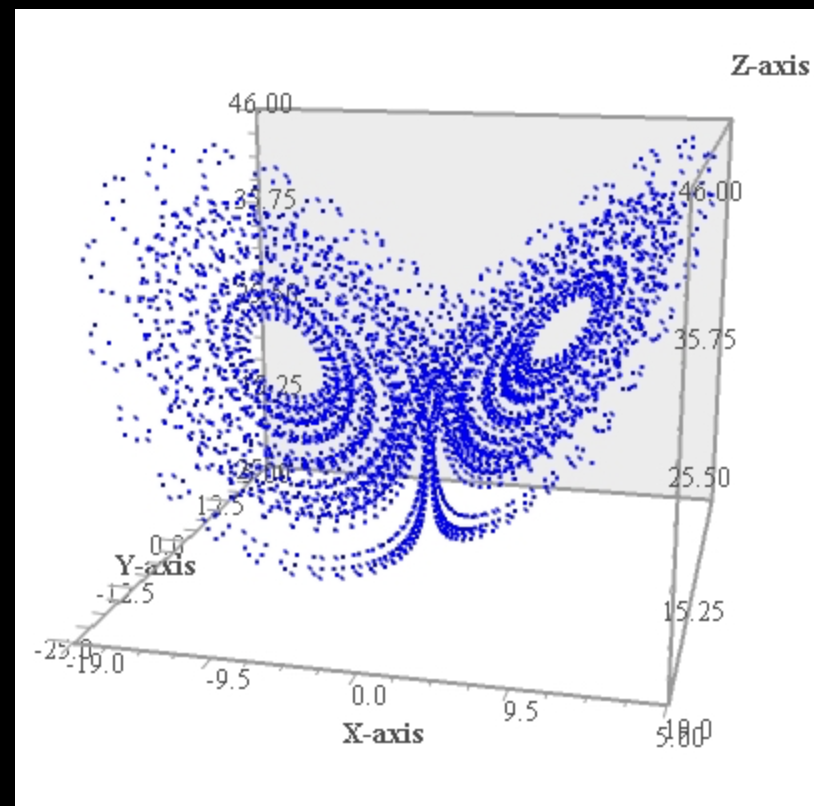

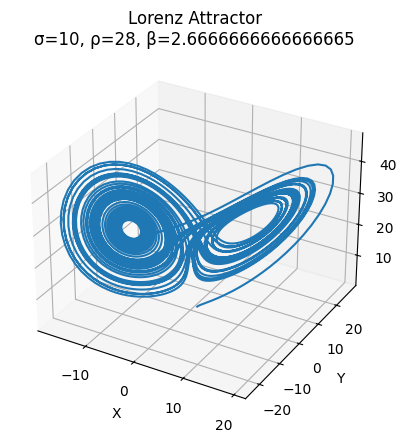

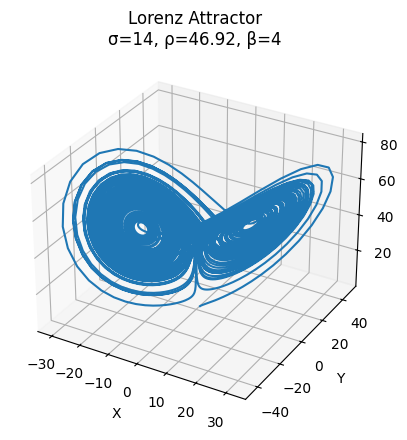

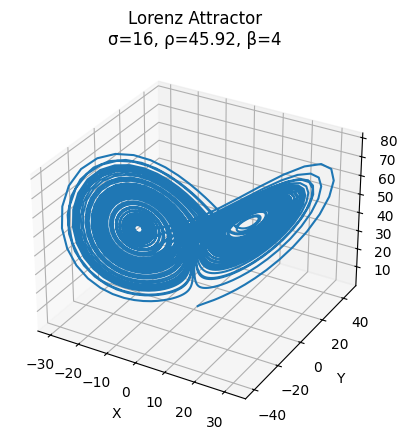

In [29]:
def lorenz_system(state, sigma, rho, beta):
    x, y, z = state
    dx_dt = sigma * (y - x)
    dy_dt = x * (rho - z) - y
    dz_dt = x * y - beta * z
    return np.array([dx_dt, dy_dt, dz_dt])

def runge_kutta_4(f, state, t, dt, sigma, rho, beta):
    k1 = dt * f(state, sigma, rho, beta)
    k2 = dt * f(state + 0.5 * k1, sigma, rho, beta)
    k3 = dt * f(state + 0.5 * k2, sigma, rho, beta)
    k4 = dt * f(state + k3, sigma, rho, beta)
    return state + (k1 + 2 * k2 + 2 * k3 + k4) / 6

def generate_trajectory(initial_state, t_max, dt, sigma, rho, beta):
    t = np.arange(0, t_max, dt)
    trajectory = np.zeros((len(t), 3))
    state = initial_state
    for i in range(len(t)):
        trajectory[i] = state
        state = runge_kutta_4(lorenz_system, state, t[i], dt, sigma, rho, beta)
    return trajectory

def plot_trajectory(trajectory, sigma, rho, beta):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot(trajectory[:, 0], trajectory[:, 1], trajectory[:, 2])
    ax.set_title(f'Lorenz Attractor\nσ={sigma}, ρ={rho}, β={beta}')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    plt.show()

params = [
    (10, 28, 8/3),
    (14, 46.92, 4),
    (16, 45.92, 4)
]

initial_state = np.array([1.0, 1.0, 1.0])
t_max = 50
dt = 0.01

for sigma, rho, beta in params:
    trajectory = generate_trajectory(initial_state, t_max, dt, sigma, rho, beta)
    plot_trajectory(trajectory, sigma, rho, beta)